Suppose we want to use climate data like the temperature, rainfall, and humidity to determine if a region is well suited for growing apples. A simple approach for doing this would be to formulate the relationship between the annual yield of apples (tons per hectare) and the climatic conditions like the average temperature (in degrees Fahrenheit), rainfall (in millimeters) & average relative humidity (in percentage) as a linear equation.

yield_of_apples = w1 * temperature + w2 * rainfall + w3 * humidity

We're expressing the yield of apples as a weighted sum of the temperature, rainfall, and humidity. This equation is an approximation since the actual relationship may not necessarily be linear, and there may be other factors involved. But a simple linear model like this often works well in practice.

Based on some statical analysis of historical data, we might come up with reasonable values for the weights w1, w2, and w3. Here's an example set of values:

In [1]:
w1, w2, w3 = 0.3, 0.2, 0.5

Given some climate data for a region, we can now predict the yield of apples. Here's some sample data:

<img src="https://i.imgur.com/TXPBiqv.png" style="width:360px;">

To begin, we can define some variables to record climate data for a region.

In [2]:
k_temp = 73
k_rainfall = 67
k_humidity = 43

In [3]:
kanto_apple_yield = k_temp*w1 + k_rainfall*w2 + k_humidity*w3
kanto_apple_yield

56.8

In [4]:
print("the expected yield of apple in kanto region is {} tons per hectare".format(kanto_apple_yield))

the expected yield of apple in kanto region is 56.8 tons per hectare


  Performing above computation for multiple regions, we can represent the climate data and weights for each region as a vector, i.e., a list of numbers.

In [5]:
kanto = [73, 67, 43]
johto = [91, 88, 64]
hoenn = [87, 134, 58]
sinnoh = [102, 43, 37]
unova = [69, 96, 70]

weights = [w1, w2, w3]

We can now write a function `crop_yield` to calcuate the yield of apples (or any other crop) given the climate data and the respective weights.

In [6]:
def crop_yield(region, weights):
    result = 0
    for x, w in zip(region, weights):
        result += x * w
    return result

In [7]:
crop_yield(kanto, weights)

56.8

'' zip() is a built in function that gives the values in pair from the lists or gives a paired tuple''

In [8]:
for item in zip(kanto,hoenn,weights):
     print(item)

(73, 87, 0.3)
(67, 134, 0.2)
(43, 58, 0.5)


# NUMPY

#### used for numerical computing

In [9]:
import numpy as np

In [10]:
kanto = np.array([73, 67, 43])

In [11]:
weights = np.array([w1, w2, w3])

Just like lists, Numpy arrays support the indexing notation `[]`.

In [12]:
weights[1]

0.2

In [13]:
np.dot(kanto, weights)

56.8

In [14]:
(kanto * weights).sum()

56.8

The `*` operator performs an element-wise multiplication of two arrays if they have the same size. The `sum` method calculates the sum of numbers in an array.

 #### comparison of dot products performed using Python loops vs. Numpy arrays on two vectors with a million elements each.

In [15]:
# Python lists
arr1 = list(range(1000000))
arr2 = list(range(1000000, 2000000))

# Numpy arrays
arr1_np = np.array(arr1)
arr2_np = np.array(arr2)

In [16]:
%%time
result = 0
for x1, x2 in zip(arr1, arr2):
    result += x1*x2
result

Wall time: 536 ms


833332333333500000

In [17]:
%%time
np.dot(arr1_np, arr2_np)

Wall time: 7.98 ms


-1942957984

Inference: Hence, dot product using numpy arrays is better than python loop in terms of time as well as lines of code.

### multidimesional  numpy arrays

In [18]:
#1-D array
arr1 = np.array([1,2,3])

#2-D array
arr2 = np.array([[1,2,3],
                 [2,3,4]])

#3-D array
arr3 = np.array([[[1,2,3],
                  [2,3,4]],
                 [[2,4,6],
                  [4,6,8]]])

In [19]:
arr1.shape

(3,)

In [20]:
arr2.shape

(2, 3)

In [21]:
arr3.shape

(2, 2, 3)

output format:(number of total lists, number of lists in lists, number of elements in a list)

#### matrix multiplication using 
np.matmul or @ operator

In [22]:
np.matmul(arr2,arr3)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

number of columns in first matrix must be equal to number of rows in second matrix.

In [23]:
arr4 = np.array([[2,3],
                 [3,4],
                 [4,5]])

arr2 @ arr4

array([[20, 26],
       [29, 38]])

In [24]:
np.matmul(arr2,arr4)

array([[20, 26],
       [29, 38]])

#### importing files
(To read file into a numpy array, we can use the genfromtxt function.)

In [25]:
import urllib.request

urllib.request.urlretrieve(
    'https://hub.jovian.ml/wp-content/uploads/2020/08/climate.csv', 
    'climate.txt')

('climate.txt', <http.client.HTTPMessage at 0x242ca05da90>)

In [26]:
file1 = open('climate.txt', mode='r')
print(file1.read())

temperature,rainfall,humidity
25.00,76.00,99.00
39.00,65.00,70.00
59.00,45.00,77.00
84.00,63.00,38.00
66.00,50.00,52.00
41.00,94.00,77.00
91.00,57.00,96.00
49.00,96.00,99.00
67.00,20.00,28.00
85.00,31.00,95.00
78.00,46.00,34.00
31.00,40.00,63.00
52.00,77.00,85.00
28.00,66.00,77.00
32.00,50.00,57.00
31.00,79.00,53.00
45.00,76.00,48.00
80.00,52.00,27.00
24.00,45.00,90.00
20.00,89.00,84.00
32.00,20.00,96.00
56.00,44.00,74.00
93.00,70.00,80.00
62.00,87.00,73.00
85.00,48.00,90.00
87.00,86.00,93.00
43.00,57.00,69.00
28.00,71.00,44.00
44.00,95.00,58.00
88.00,48.00,46.00
80.00,50.00,38.00
27.00,75.00,89.00
93.00,61.00,73.00
31.00,87.00,62.00
38.00,94.00,44.00
55.00,93.00,55.00
56.00,22.00,47.00
38.00,64.00,79.00
26.00,22.00,40.00
27.00,98.00,24.00
55.00,37.00,38.00
63.00,69.00,46.00
21.00,34.00,21.00
31.00,89.00,85.00
45.00,69.00,91.00
48.00,86.00,77.00
27.00,51.00,27.00
40.00,47.00,88.00
29.00,45.00,69.00
35.00,55.00,85.00
62.00,43.00,58.00
67.00,95.00,54.00
35.00,46.00,55.00
36.00,75.00,28.0

In [27]:
#removing header 
climate_data = np.genfromtxt('climate.txt', delimiter=',', skip_header=1)
climate_data

array([[25., 76., 99.],
       [39., 65., 70.],
       [59., 45., 77.],
       ...,
       [99., 62., 58.],
       [70., 71., 91.],
       [92., 39., 76.]])

In [28]:
weights = np.array([0.3, 0.2, 0.5])
yields = climate_data @ weights

In [29]:
climate_results = np.concatenate((climate_data, yields.reshape(10000, 1)), axis=1)
#axis=1 denotes adding a COLUMN whereas axis=0 denotes adding a row
climate_results

array([[25. , 76. , 99. , 72.2],
       [39. , 65. , 70. , 59.7],
       [59. , 45. , 77. , 65.2],
       ...,
       [99. , 62. , 58. , 71.1],
       [70. , 71. , 91. , 80.7],
       [92. , 39. , 76. , 73.4]])

In [30]:
np.savetxt('climate_results.txt', 
           climate_results, 
           fmt='%.2f', 
           delimiter=',',
           header='temperature,rainfall,humidity,yeild_apples', 
           comments='')

In [31]:
file2 = open('climate_results.txt', mode='r')
print(file2.read())

temperature,rainfall,humidity,yeild_apples
25.00,76.00,99.00,72.20
39.00,65.00,70.00,59.70
59.00,45.00,77.00,65.20
84.00,63.00,38.00,56.80
66.00,50.00,52.00,55.80
41.00,94.00,77.00,69.60
91.00,57.00,96.00,86.70
49.00,96.00,99.00,83.40
67.00,20.00,28.00,38.10
85.00,31.00,95.00,79.20
78.00,46.00,34.00,49.60
31.00,40.00,63.00,48.80
52.00,77.00,85.00,73.50
28.00,66.00,77.00,60.10
32.00,50.00,57.00,48.10
31.00,79.00,53.00,51.60
45.00,76.00,48.00,52.70
80.00,52.00,27.00,47.90
24.00,45.00,90.00,61.20
20.00,89.00,84.00,65.80
32.00,20.00,96.00,61.60
56.00,44.00,74.00,62.60
93.00,70.00,80.00,81.90
62.00,87.00,73.00,72.50
85.00,48.00,90.00,80.10
87.00,86.00,93.00,89.80
43.00,57.00,69.00,58.80
28.00,71.00,44.00,44.60
44.00,95.00,58.00,61.20
88.00,48.00,46.00,59.00
80.00,50.00,38.00,53.00
27.00,75.00,89.00,67.60
93.00,61.00,73.00,76.60
31.00,87.00,62.00,57.70
38.00,94.00,44.00,52.20
55.00,93.00,55.00,62.60
56.00,22.00,47.00,44.70
38.00,64.00,79.00,63.70
26.00,22.00,40.00,32.20
27.00,98.00,24.00,39.

|| numpy arrays support adding a scalar,element-wise multiplication and subtraction, divison by scalar, modulus with scalar||

#### Array Broadcasting

Numpy arrays also support *broadcasting*, allowing arithmetic operations between two arrays with different numbers of dimensions but compatible shapes.

*Important* 
Broadcasting only works if one of the arrays can be replicated to match the other array's shape.

In [32]:
array1 = np.array([[1, 2, 3, 4], 
                 [5, 6, 7, 8], 
                 [9, 1, 2, 3]])

In [33]:
array2 = np.array([4, 5, 6, 7])

In [34]:
array3 = np.array([7, 8])

In [35]:
array1 + array2

array([[ 5,  7,  9, 11],
       [ 9, 11, 13, 15],
       [13,  6,  8, 10]])

In [36]:
#incompatible shapes arrays
array1 + array3

ValueError: operands could not be broadcast together with shapes (3,4) (2,) 

#### array comparison

Numpy arrays also support comparison operations like ==, !=, > etc. The result is an array of booleans.

In [37]:
arr1 = np.array([[2, 4, 3], [3, 4, 5]])
arr2 = np.array([[2, 2, 3], [2, 2, 5]])

In [38]:
arr1 == arr2

array([[ True, False,  True],
       [False, False,  True]])

Array comparison is frequently used to count the number of equal elements in two arrays using the `sum` method. Remember that `True` evaluates to `1` and `False` evaluates to `0` when booleans are used in arithmetic operations.

In [39]:
(arr1 == arr2).sum()

3

#### Array indexing and slicing

Numpy extends Python's list indexing notation using `[]`. we can provide a comma-separated list of indices or ranges to select a specific element or a subarray (also called a slice) from a Numpy array.

In [40]:
arr3 = np.array([
    [[11, 12, 13, 14], 
     [13, 14, 15, 19]], 
    
    [[15, 16, 17, 21], 
     [63, 92, 36, 18]], 
    
    [[98, 32, 81, 23],      
     [17, 18, 19.5, 43]]])

In [41]:
# Single element
arr3[1, 1, 2]

36.0

In [42]:
# Mixing indices and ranges
arr3[1:, 1, :3]

array([[63. , 92. , 36. ],
       [17. , 18. , 19.5]])

In [43]:
# Using too many indices
arr3[1,3,2,1]

IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

#### creating numpy arrays 
(zero, identity etc.)

In [44]:
# All zeros
np.zeros((3, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [45]:
# All ones
np.ones([2, 2, 3])

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]])

In [46]:
# Identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [47]:
# Random vector
np.random.rand(5)

array([0.97358534, 0.3358911 , 0.93783383, 0.57551201, 0.37654015])

In [48]:
# Random matrix
np.random.randn(2, 3) 

array([[ 1.2969948 ,  0.55288714, -1.7507887 ],
       [-1.53894502, -0.84287527,  0.12471044]])

*Important*

rand gives values between 0 to 1.
randn gives value from gaussean distribution.

In [49]:
# Fixed value
np.full([2, 3], 42)

array([[42, 42, 42],
       [42, 42, 42]])

In [50]:
# Range with start, end and step
np.arange(10, 90, 3)

array([10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58,
       61, 64, 67, 70, 73, 76, 79, 82, 85, 88])

In [51]:
# Equally spaced numbers in a range (start,end,number of elements needed)
np.linspace(3, 27, 6)

array([ 3. ,  7.8, 12.6, 17.4, 22.2, 27. ])

# PANDAS

In [52]:
from urllib.request import urlretrieve

In [53]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x242ca057df0>)

In [54]:
import pandas as pd

In [55]:
covid_df = pd.read_csv('italy-covid-daywise.csv')

In [56]:
#gives the basic info of datatype,column, rows
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [57]:
#gives statical data
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [58]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [59]:
covid_df.shape

(248, 4)

In [60]:
#use .at or directly ['col_name'][row number] to fetch a particular value
covid_df.at[243,'new_cases']
# or
covid_df['new_cases'][243]


1444.0

*important*
 This . method only works for columns whose names do not contain spaces or special characters.
 Further, you can also pass a list of columns within the indexing notation `[]` to access a subset of the data frame with just the given columns.

In [61]:
covid_df_copy = covid_df.copy()

In [62]:
covid_df.loc[243]

date          2020-08-30
new_cases         1444.0
new_deaths           1.0
new_tests        53541.0
Name: 243, dtype: object

In [63]:
covid_df.head(5)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [64]:
covid_df.tail(5)

,date,new_cases,new_deaths,new_tests
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


We can find the first index that doesn't contain a NaN value using a column's first_valid_index method.

In [65]:
covid_df.new_tests.first_valid_index()

111

In [66]:
covid_df.loc[108:113]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0


In [67]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
112,2020-04-21,2256.0,454.0,28095.0
26,2020-01-26,0.0,0.0,NaN
63,2020-03-03,347.0,17.0,NaN
247,2020-09-03,1326.0,6.0,NaN
205,2020-07-23,280.0,9.0,33018.0
103,2020-04-12,4694.0,619.0,NaN
55,2020-02-24,53.0,0.0,NaN
159,2020-06-07,270.0,72.0,27894.0
208,2020-07-26,274.0,5.0,25177.0
136,2020-05-15,992.0,262.0,39027.0


The data frame contains 72 rows, but only the first & last five rows are displayed by default with Jupyter for brevity. We can change some display options to view all the rows.

In [68]:
from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(covid_df[covid_df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


In [69]:
positive_rate = covid_df.new_cases.sum() / covid_df.new_tests.sum()

In [70]:
high_ratio_df = covid_df[covid_df.new_cases / covid_df.new_tests > positive_rate]

In [71]:
high_ratio_df 

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
124,2020-05-03,1900.0,474.0,27047.0
128,2020-05-07,1444.0,369.0,13665.0


In [72]:
#add a new column to the data frame.
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [73]:
covid_df.drop(columns=['positive_rate'], inplace=True)

When inplace = True , the data is modified in place, which means it will not return the copy of object and the dataframe is now updated. When inplace = False , which is the default, then the operation is performed and it returns a copy of the object.

In [74]:
covid_df.sort_values('new_cases', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [75]:
#Replacing a value within the data frame
covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + covid_df.at[173, 'new_cases'])/2

### working with dates

In [76]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

The data type of date is currently `object`, so Pandas does not know that this column is a date. We can convert it into a `datetime` column using the `pd.to_datetime` method.

In [77]:
covid_df['date'] = pd.to_datetime(covid_df.date)

In [78]:
covid_df['date']

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [79]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [80]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [81]:
# Query the rows for May
covid_df_may = covid_df[covid_df.month == 5]

# Extract the subset of columns to be aggregated
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]

# Get the column-wise sum
covid_may_totals = covid_df_may_metrics.sum()

In [82]:
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [83]:
# Average for Sundays
covid_df[covid_df.weekday == 6].new_cases.mean()

1247.2571428571428

#### Grouping and aggregation 
groupby function

In [84]:
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()

In [85]:
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


#### Merging data from multiple sources

1.retrieve another url say urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')
2.read file as: locations_df = pd.read_csv('locations.csv')

*important*
To merge two data frames, we need at least one common column.

3.insert column as covid_df['location'] = "Italy"
4.We can now add the columns from `locations_df` into `covid_df` using the `.merge` method.
  for example: merged_df = covid_df.merge(locations_df, on="location")

#### Basic plotting with pandas

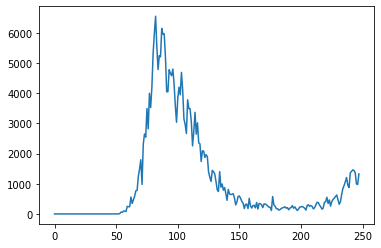

In [86]:
covid_df.new_cases.plot();

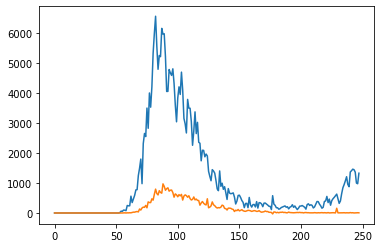

In [87]:
covid_df.new_cases.plot()
covid_df.new_deaths.plot();

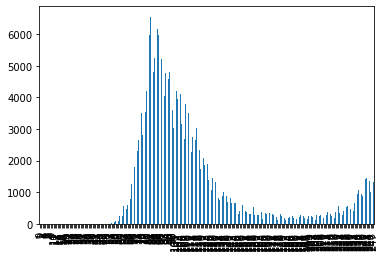

In [88]:
covid_df.new_cases.plot(kind='bar');

# Matplotlib & Seaborn

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [90]:
yield_apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931]

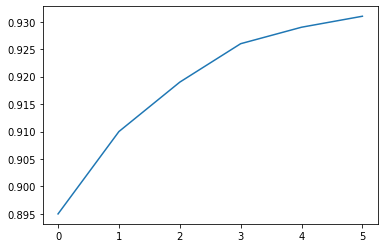

In [91]:
#line chart
plt.plot(yield_apples);

In [92]:
years = range(2000, 2012)
apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931, 0.934, 0.936, 0.937, 0.9375, 0.9372, 0.939]
oranges = [0.962, 0.941, 0.930, 0.923, 0.918, 0.908, 0.907, 0.904, 0.901, 0.898, 0.9, 0.896, ]

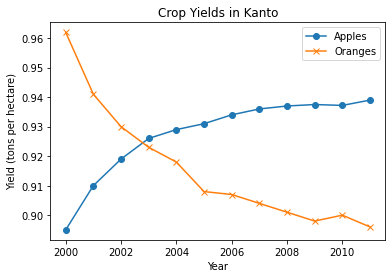

In [93]:
plt.plot(years, apples, marker='o')
plt.plot(years, oranges, marker='x')

plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')

plt.title("Crop Yields in Kanto")
plt.legend(['Apples', 'Oranges']);

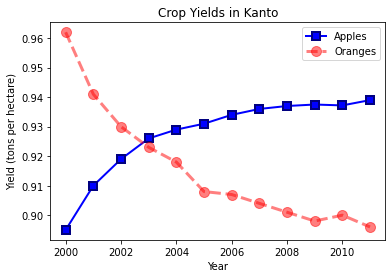

In [94]:
plt.plot(years, apples, marker='s', c='b', ls='-', lw=2, ms=8, mew=2, mec='navy')
plt.plot(years, oranges, marker='o', c='r', ls='--', lw=3, ms=10, alpha=.5)

plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')

plt.title("Crop Yields in Kanto")
plt.legend(['Apples', 'Oranges']);

The `fmt` argument provides a shorthand for specifying the marker shape, line style, and line color. It can be provided as the third argument to `plt.plot`.

```
fmt = '[marker][line][color]'
```


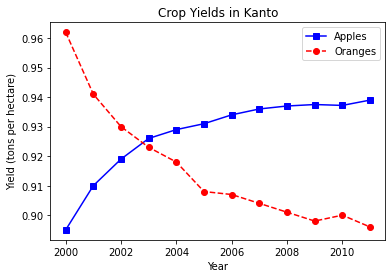

In [95]:
plt.plot(years, apples, 's-b')
plt.plot(years, oranges, 'o--r')

plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')

plt.title("Crop Yields in Kanto")
plt.legend(['Apples', 'Oranges']);

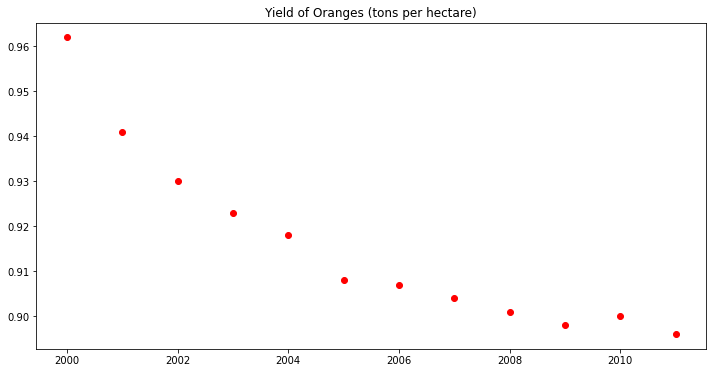

In [96]:
plt.figure(figsize=(12, 6))
plt.plot(years, oranges, 'or')
plt.title("Yield of Oranges (tons per hectare)");

 #### sns.set_style function

In [97]:
import seaborn as sns
sns.set_style("darkgrid")
#we can also use whitegrid

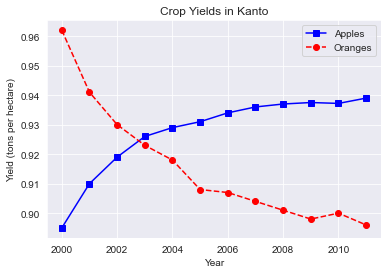

In [98]:
plt.plot(years, apples, 's-b')
plt.plot(years, oranges, 'o--r')

plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')

plt.title("Crop Yields in Kanto")
plt.legend(['Apples', 'Oranges']);

we can also edit default styles directly by modifying the `matplotlib.rcParams` dictionary.

In [99]:
import matplotlib

In [100]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

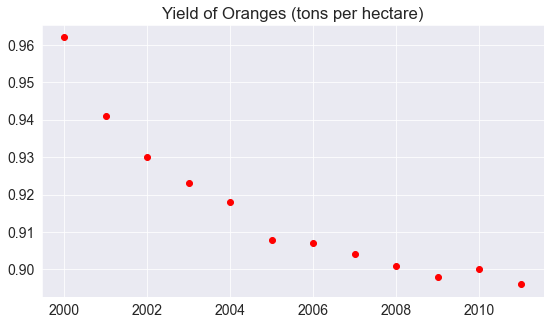

In [101]:
plt.plot(years, oranges, 'or')
plt.title("Yield of Oranges (tons per hectare)");

#### scatter plot

In a scatter plot, the values of 2 variables are plotted as points on a 2-dimensional grid. Additionally, you can also use a third variable to determine the size or color of the points. 

The [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) provides sample measurements of sepals and petals for three species of flowers. The Iris dataset is included with the Seaborn library and can be loaded as a Pandas data frame.

In [102]:
# Load data into a Pandas dataframe
flowers_df = sns.load_dataset("iris")

In [103]:
flowers_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


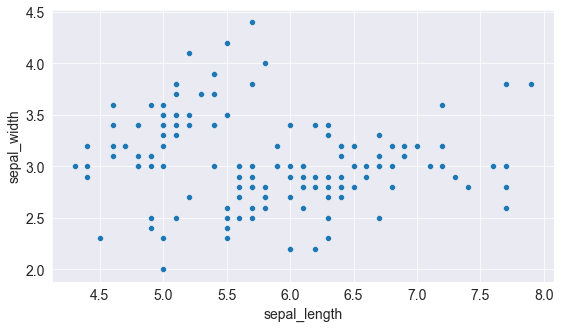

In [104]:
sns.scatterplot(x=flowers_df.sepal_length, y=flowers_df.sepal_width);

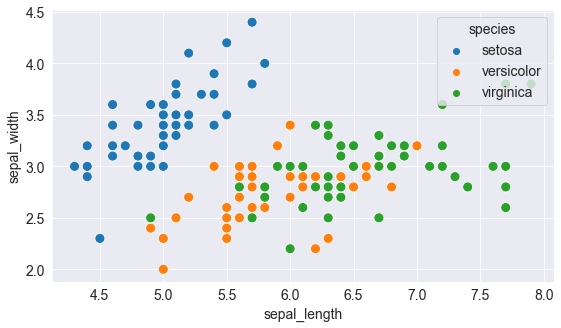

In [105]:
#adding hues
sns.scatterplot(x=flowers_df.sepal_length, y=flowers_df.sepal_width, hue=flowers_df.species, s=100);

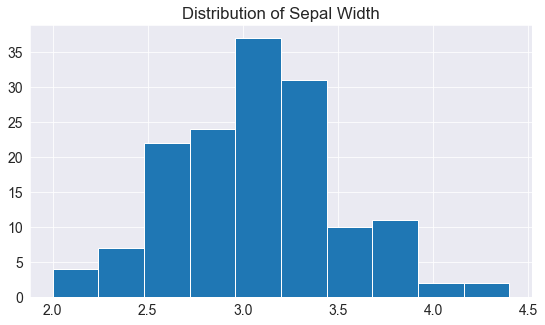

In [106]:
# HISTOGRAM
plt.title("Distribution of Sepal Width")
plt.hist(flowers_df.sepal_width);

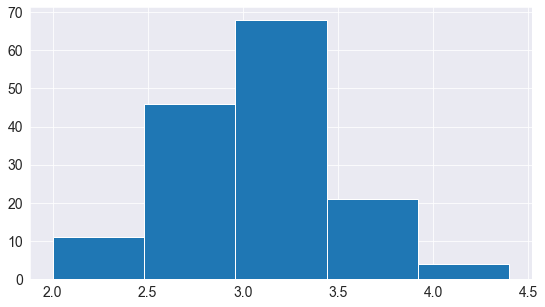

In [107]:
#controlling size & number of bins
plt.hist(flowers_df.sepal_width, bins=5);

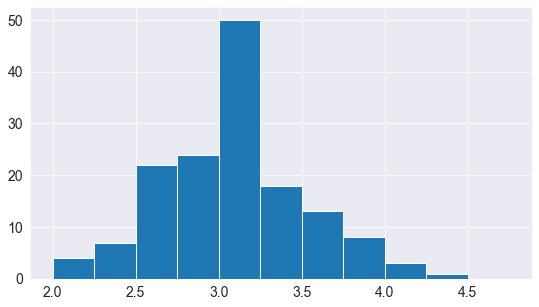

In [108]:
import numpy as np

# Specifying the boundaries of each bin
plt.hist(flowers_df.sepal_width, bins=np.arange(2, 5, 0.25));

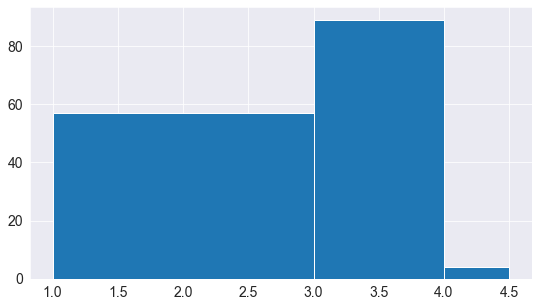

In [109]:
# Bins of unequal sizes
plt.hist(flowers_df.sepal_width, bins=[1, 3, 4, 4.5]);

In [110]:
setosa_df = flowers_df[flowers_df.species == 'setosa']
versicolor_df = flowers_df[flowers_df.species == 'versicolor']
virginica_df = flowers_df[flowers_df.species == 'virginica']

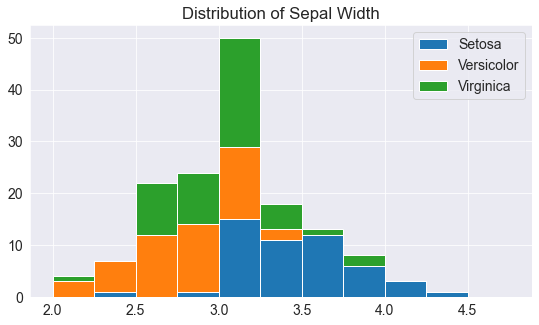

In [111]:
plt.title('Distribution of Sepal Width')

plt.hist([setosa_df.sepal_width, versicolor_df.sepal_width, virginica_df.sepal_width], 
         bins=np.arange(2, 5, 0.25), 
         stacked=True);

plt.legend(['Setosa', 'Versicolor', 'Virginica']);

In [112]:
years = range(2000, 2006)
apples = [0.35, 0.6, 0.9, 0.8, 0.65, 0.8]
oranges = [0.4, 0.8, 0.9, 0.7, 0.6, 0.8]

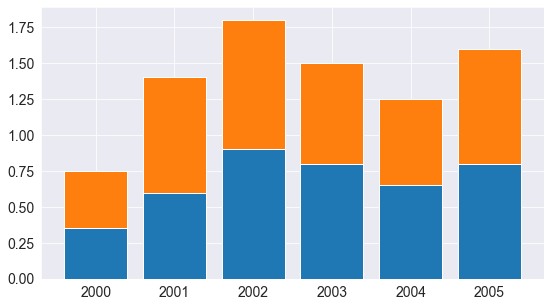

In [113]:
plt.bar(years, apples)
plt.bar(years, oranges, bottom=apples);

#### Bar Plots with Averages

In [114]:
tips_df = sns.load_dataset("tips");

In [115]:
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


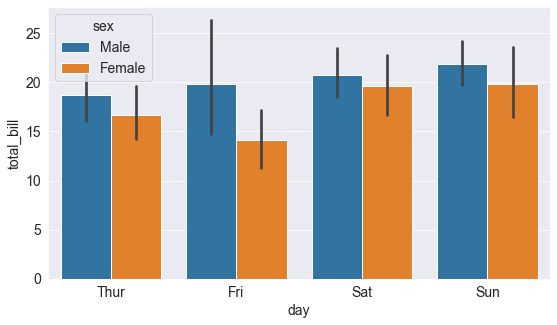

In [116]:
#Seaborn library provides a barplot function which can automatically compute averages.
sns.barplot(x='day', y='total_bill', hue='sex', data=tips_df);

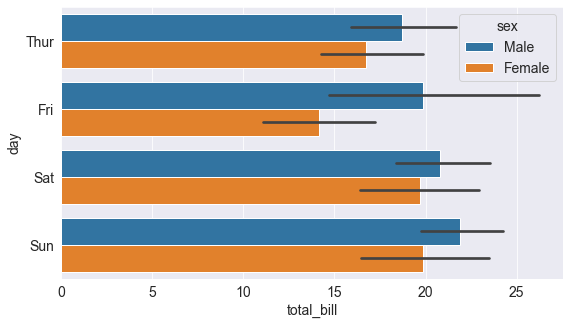

In [117]:
#horizontal bars by swiching the axis
sns.barplot(x='total_bill', y='day', hue='sex', data=tips_df);

### Heatmap

A heatmap is used to visualize 2-dimensional data like a matrix or a table using colors. The best way to understand it is by looking at an example. We'll use another sample dataset from Seaborn, called `flights`, to visualize monthly passenger footfall at an airport over 12 years.

In [118]:
flights_df = sns.load_dataset("flights").pivot("month", "year", "passengers")
flights_df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


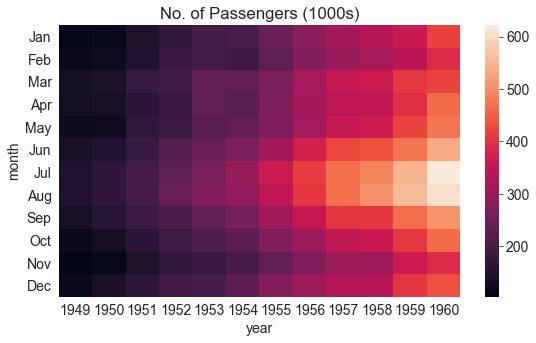

In [119]:
plt.title("No. of Passengers (1000s)")
sns.heatmap(flights_df);

Inferences:
- The footfall at the airport in any given year tends to be the highest around July & August.
- The footfall at the airport in any given month tends to grow year by year.

We can also display the actual values in each block by specifying `annot=True` and using the `cmap` argument to change the color palette.

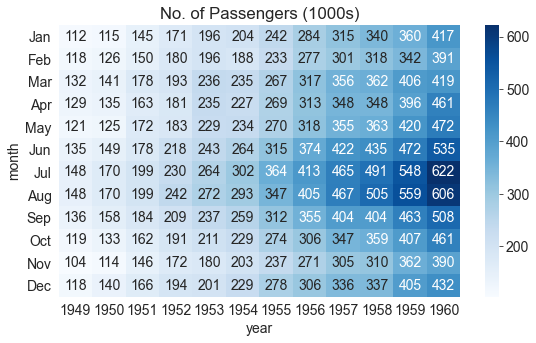

In [120]:
plt.title("No. of Passengers (1000s)")
sns.heatmap(flights_df, fmt="d", annot=True, cmap='Blues');

## Importing Images

In [121]:
from urllib.request import urlretrieve
urlretrieve('https://i.imgur.com/SkPbq.jpg', 'chart.jpg');

In [122]:
# IMPORTANT: Before displaying an image, it has to be read into memory using the `PIL` module.
from PIL import Image

In [123]:
img = Image.open('chart.jpg')

An image loaded using PIL is simply a 3-dimensional numpy array containing pixel intensities for the red, green & blue (RGB) channels of the image. We can convert the image into an array using `np.array`.

In [124]:
img_array = np.array(img)
img_array.shape

(481, 640, 3)

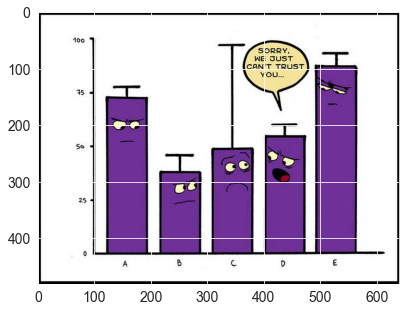

In [125]:
#displaying PIL image
plt.imshow(img);

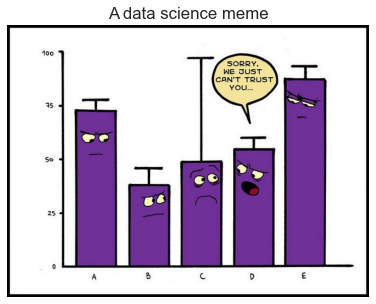

In [126]:
plt.grid(False)
plt.title('A data science meme')
plt.axis('off')
plt.imshow(img);

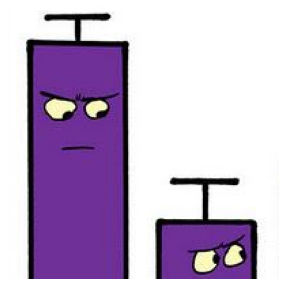

In [127]:
plt.grid(False)
plt.axis('off')
plt.imshow(img_array[125:325,105:305]);

## Plotting multiple charts in a grid

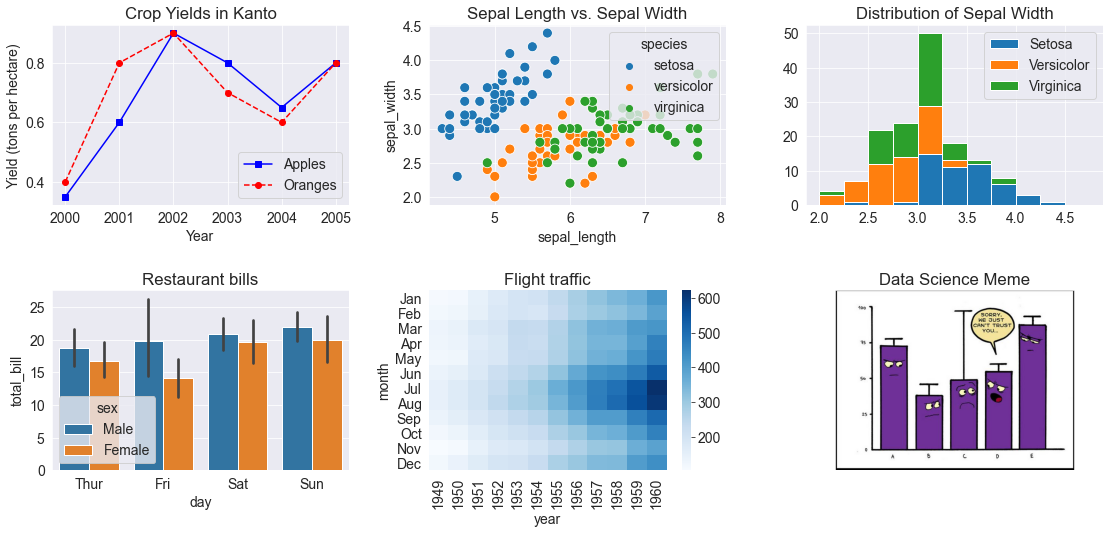

In [128]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

# Use the axes for plotting
axes[0,0].plot(years, apples, 's-b')
axes[0,0].plot(years, oranges, 'o--r')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Yield (tons per hectare)')
axes[0,0].legend(['Apples', 'Oranges']);
axes[0,0].set_title('Crop Yields in Kanto')


# Pass the axes into seaborn
axes[0,1].set_title('Sepal Length vs. Sepal Width')
sns.scatterplot(x=flowers_df.sepal_length, 
                y=flowers_df.sepal_width, 
                hue=flowers_df.species, 
                s=100, 
                ax=axes[0,1]);

# Use the axes for plotting
axes[0,2].set_title('Distribution of Sepal Width')
axes[0,2].hist([setosa_df.sepal_width, versicolor_df.sepal_width, virginica_df.sepal_width], 
         bins=np.arange(2, 5, 0.25), 
         stacked=True);

axes[0,2].legend(['Setosa', 'Versicolor', 'Virginica']);

# Pass the axes into seaborn
axes[1,0].set_title('Restaurant bills')
sns.barplot(x='day', y='total_bill', hue='sex', data=tips_df, ax=axes[1,0]);

# Pass the axes into seaborn
axes[1,1].set_title('Flight traffic')
sns.heatmap(flights_df, cmap='Blues', ax=axes[1,1]);

# Plot an image using the axes
axes[1,2].set_title('Data Science Meme')
axes[1,2].imshow(img)
axes[1,2].grid(False)
axes[1,2].set_xticks([])
axes[1,2].set_yticks([])

plt.tight_layout(pad=2);

### Pair plots with Seaborn

Seaborn also provides a helper function `sns.pairplot` to automatically plot several different charts for pairs of features within a dataframe.

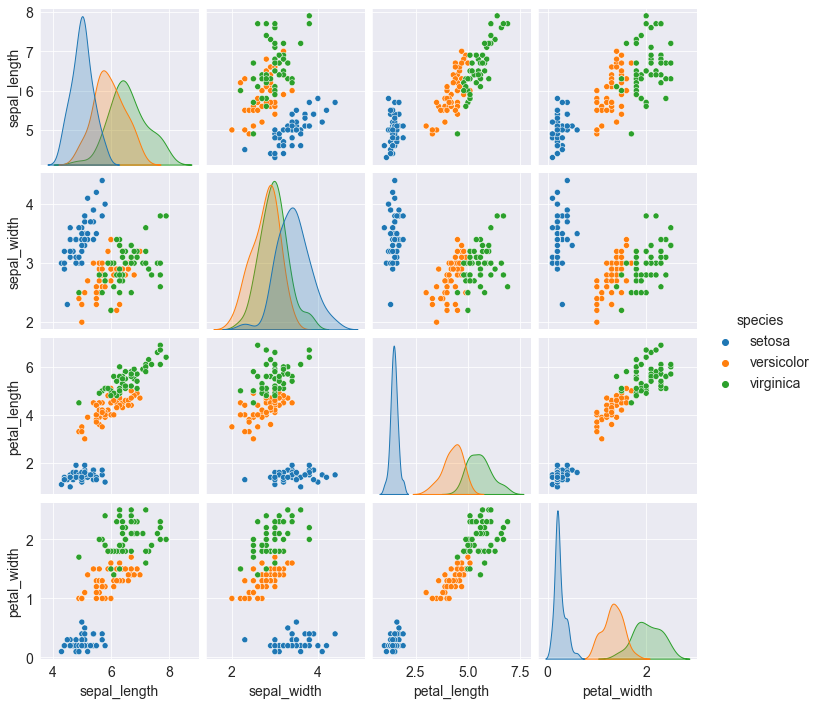

In [129]:
sns.pairplot(flowers_df, hue='species');

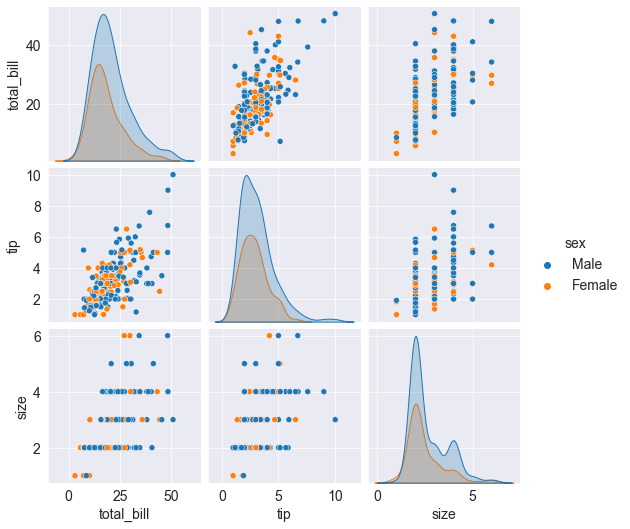

In [130]:
sns.pairplot(tips_df, hue='sex');

## Contour Plot

Contour plot uses contours or color-coded regions helps us to visualize 3 numerical variables in two dimensions. One variable is represented on the horizontal axis and a second variable is represented on the vertical axis. The third variable is represented by a color gradient and isolines (lines of constant value). 

## Example
We can visulize the values of sepal width & sepal length from the flowers dataset using a contour plot. The shade of blue represent the density of values in a region of the graph.

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


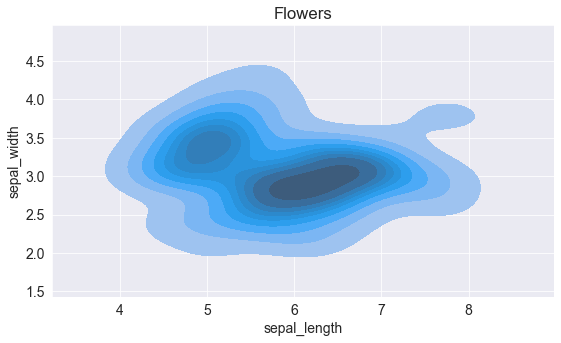

In [135]:
plt.title("Flowers")

sns.kdeplot(flowers_df.sepal_length, flowers_df.sepal_width, shade=True, shade_lowest=False);

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\chira\appdata\local\programs\p

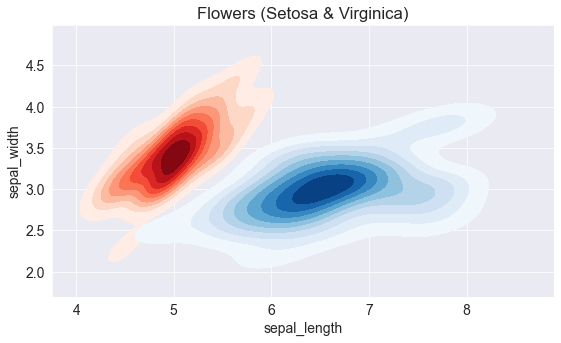

In [137]:
setosa = flowers_df[flowers_df.species == 'setosa']
virginica = flowers_df[flowers_df.species == 'virginica']

plt.title("Flowers (Setosa & Virginica)")

sns.kdeplot(setosa.sepal_length, setosa.sepal_width, shade=True, cmap='Reds', shade_lowest=False)
sns.kdeplot(virginica.sepal_length, virginica.sepal_width, shade=True, cmap='Blues', shade_lowest=False);

## Box Plot
A box plot shows the distribution of data along a single axis, using a "box" and "whiskers". The lower end of the box represents the 1st quartile (i.e. 25% of values are below it), and the upper end of the box represents the 3rd quartile (i.e. 25% of values are above it). The median value is represented via a line inside the box. The "whiskers" represent the minimum & maximum values (sometimes excluding outliers, which are represented as dots).

### Example
We'll use another sample dataset included with Seaborn, called "tips". The dataset contains information about the sex, time of day, total bill and tip amount for customers visiting a restraurant over a week.

In [133]:
# Load the example tips dataset
tips = sns.load_dataset("tips");
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


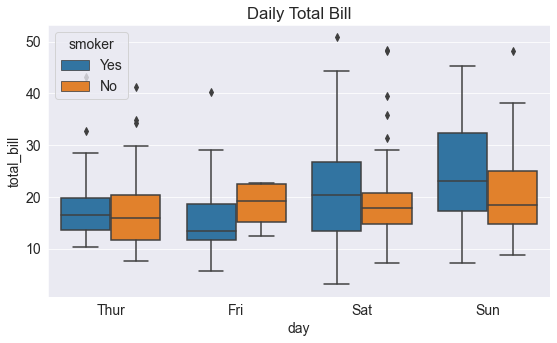

In [134]:
# Chart title
plt.title("Daily Total Bill")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(tips.day, tips.total_bill, hue=tips.smoker);